In [7]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy import interpolate
from lmfit import Model,Parameters,report_fit, Minimizer
import csv
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD, SparseCoder, NMF
from sklearn.decomposition import MiniBatchDictionaryLearning, KernelPCA
import time, sys
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [8]:
parametros_trap=np.genfromtxt('../data/parametros_traps.txt',delimiter='_')
delta=parametros_trap[:,2]
tcaida=parametros_trap[:,4]

In [9]:
corr_fil_SNR_10_N=pickle.load(open('../data/corr_sum_fourier_SNR_10_N_1000.pickle', 'rb'))
corr_fil_SNR_100_N=pickle.load(open('../data/corr_sum_fourier_SNR_100_N_1000.pickle', 'rb'))

corr_pca_SNR_10_N=pickle.load(open('../data/corr_sum_PCA_SNR_10_N_1000.pickle', 'rb'))
corr_pca_SNR_100_N=pickle.load(open('../data/corr_sum_PCA_SNR_100_N_1000.pickle', 'rb'))

corr_mov_SNR_10_N=pickle.load(open('../data/corr_sum_MOV_SNR_10_N_1000.pickle', 'rb'))
corr_mov_SNR_100_N=pickle.load(open('../data/corr_sum_MOV_SNR_100_N_1000.pickle', 'rb'))

In [4]:
xlim_up=0.062

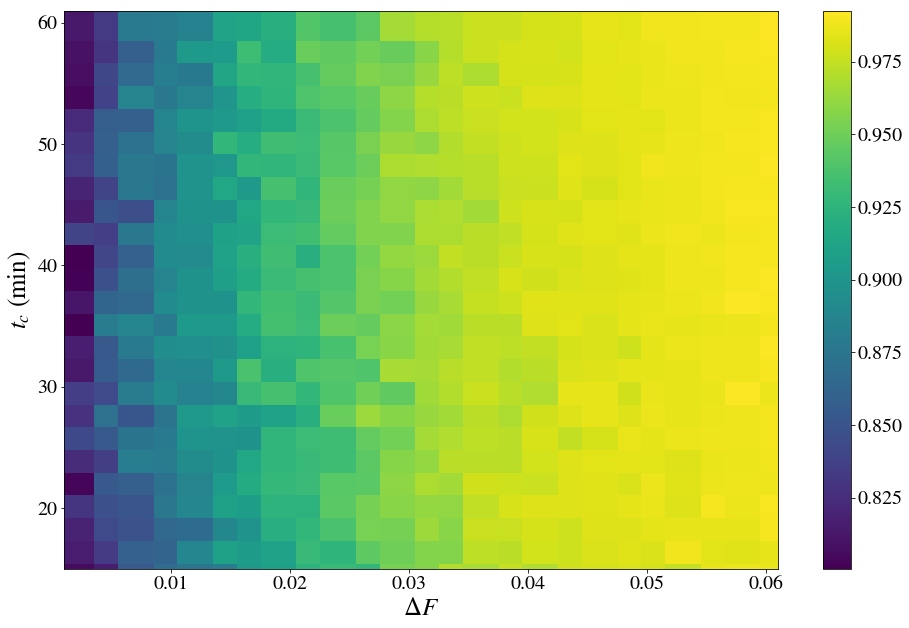

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
fig.subplots_adjust(top=0.926,bottom=0.151,left=0.151,right=0.977,hspace=0.2,wspace=0.2)
sc = ax.scatter(1-delta,tcaida, c=corr_fil_SNR_10_N,edgecolor='none', alpha=1, s=1270,marker="s"); # Sizes and colors depend on valyues of other variables
cbar = fig.colorbar(sc);
cbar.ax.tick_params(labelsize=20) 
cbar.set_label('Coeficiente de correlación', size=25)
ax.set_xlabel('$\Delta F$',size=25)
ax.set_ylabel('$t_{c}$ (min)',size=25)
ax.set_xlim(0.001,0.061)
ax.set_ylim(15,61)
plt.xticks(size=20)
plt.yticks(size=20)

plt.savefig('../reports/figures/corrFourierSNR_10.png')

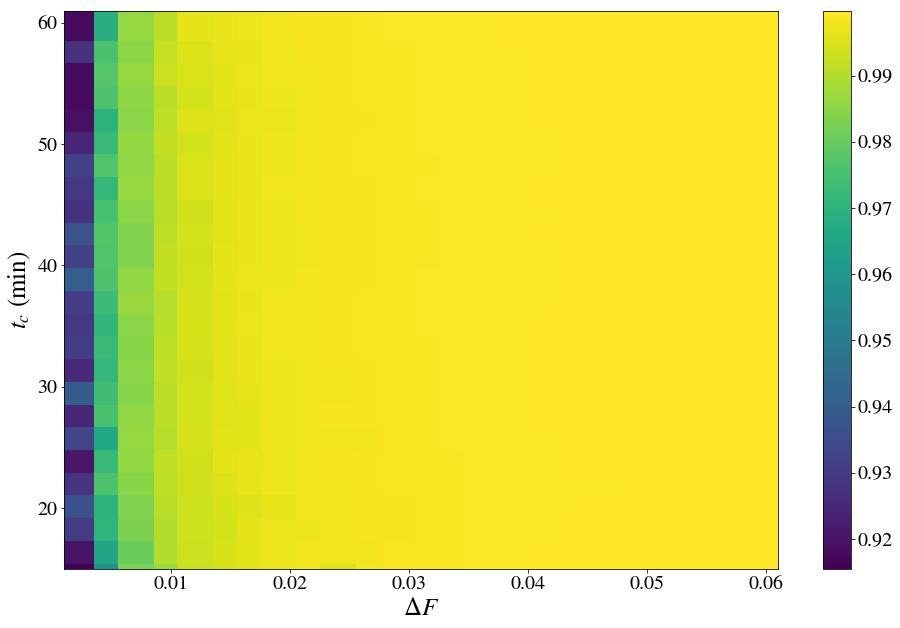

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
fig.subplots_adjust(top=0.926,bottom=0.151,left=0.151,right=0.977,hspace=0.2,wspace=0.2)
sc = ax.scatter(1-delta,tcaida, c=corr_fil_SNR_100_N,edgecolor='none', alpha=1, s=1270,marker="s"); # Sizes and colors depend on valyues of other variables
cbar = fig.colorbar(sc);
cbar.ax.tick_params(labelsize=20) 
cbar.set_label('Coeficiente de correlación', size=25)
ax.set_xlabel('$\Delta F$',size=25)
ax.set_ylabel('$t_{c}$ (min)',size=25)
ax.set_xlim(0.001,0.061)
ax.set_ylim(15,61)
plt.xticks(size=20)
plt.yticks(size=20)

plt.savefig('../reports/figures/corrFourierSNR_100.png')

PCA

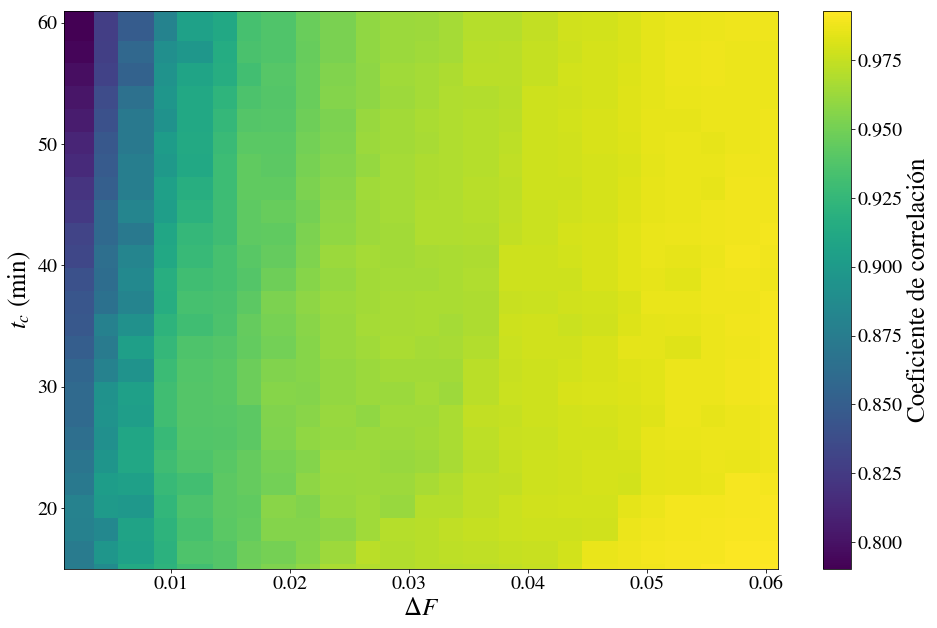

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
fig.subplots_adjust(top=0.926,bottom=0.151,left=0.151,right=0.977,hspace=0.2,wspace=0.2)
sc = ax.scatter(1-delta,tcaida, c=corr_pca_SNR_10_N,edgecolor='none', alpha=1, s=1270,marker="s"); # Sizes and colors depend on valyues of other variables
cbar = fig.colorbar(sc);
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Coeficiente de correlación', size=25)
ax.set_xlabel('$\Delta F$',size=25)
ax.set_ylabel('$t_{c}$ (min)',size=25)
ax.set_xlim(0.001,0.061)
ax.set_ylim(15,61)
plt.xticks(size=20)
plt.yticks(size=20)

plt.savefig('../reports/figures/corrPCASNR_10.png')

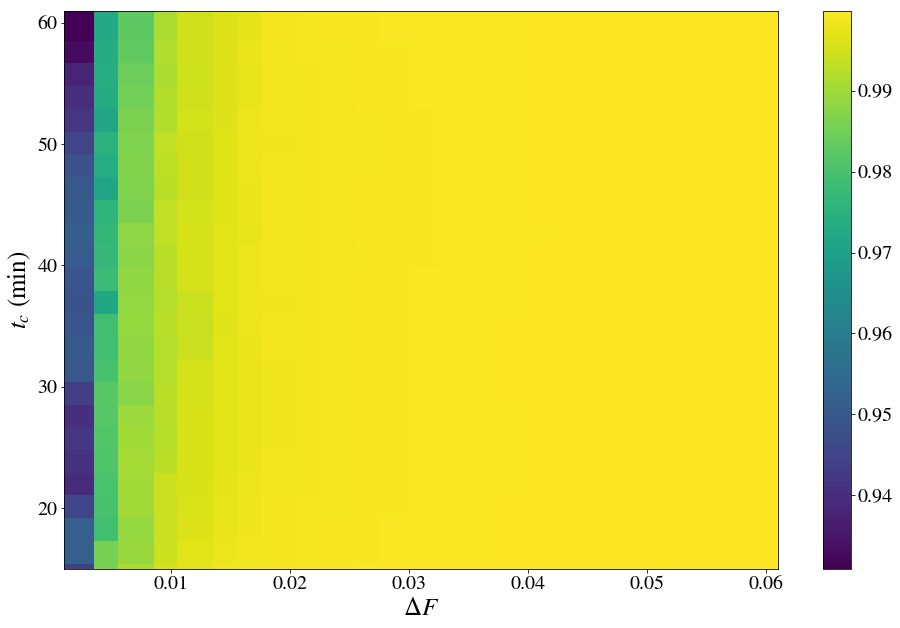

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
fig.subplots_adjust(top=0.926,bottom=0.151,left=0.151,right=0.977,hspace=0.2,wspace=0.2)
sc = ax.scatter(1-delta,tcaida, c=corr_pca_SNR_100_N,edgecolor='none', alpha=1, s=1270,marker="s"); # Sizes and colors depend on valyues of other variables
cbar = fig.colorbar(sc);
cbar.ax.tick_params(labelsize=20) 
cbar.set_label('Coeficiente de correlación', size=25)
ax.set_xlabel('$\Delta F$',size=25)
ax.set_ylabel('$t_{c}$ (min)',size=25)
ax.set_xlim(0.001,0.061)
ax.set_ylim(15,61)
plt.xticks(size=20)
plt.yticks(size=20)

plt.savefig('../reports/figures/corrPCASNR_100.png')

MOV



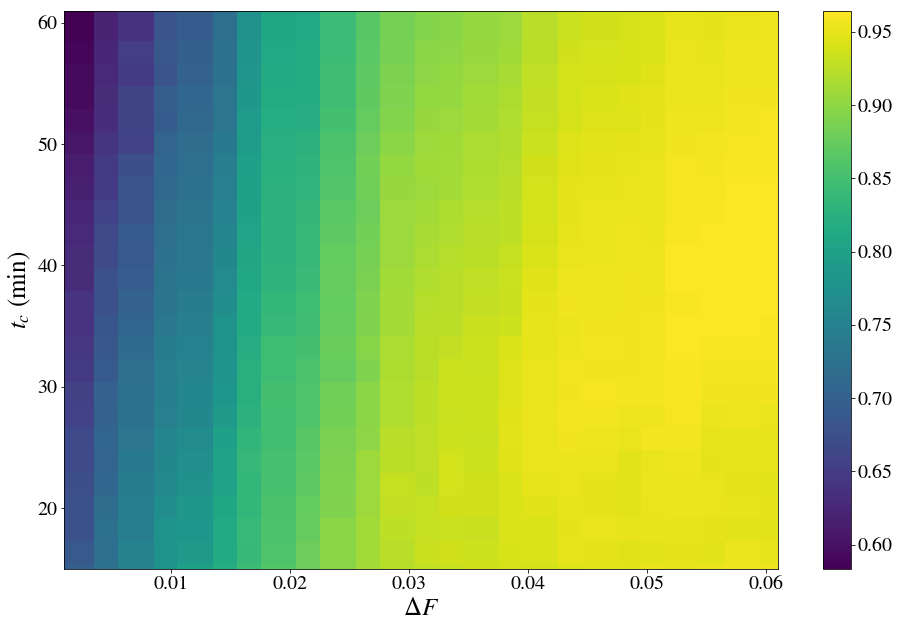

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
fig.subplots_adjust(top=0.926,bottom=0.151,left=0.151,right=0.977,hspace=0.2,wspace=0.2)
sc = ax.scatter(1-delta,tcaida, c=corr_mov_SNR_10_N,edgecolor='none', alpha=1, s=1270,marker="s"); 
cbar = fig.colorbar(sc);
cbar.ax.tick_params(labelsize=20) 
cbar.set_label('Coeficiente de correlación', size=25)
ax.set_xlabel('$\Delta F$',size=25)
ax.set_ylabel('$t_{c}$ (min)',size=25)
ax.set_xlim(0.001,0.061)
ax.set_ylim(15,61)
plt.xticks(size=20)
plt.yticks(size=20)

plt.savefig('../reports/figures/corrMovSNR_10.png')

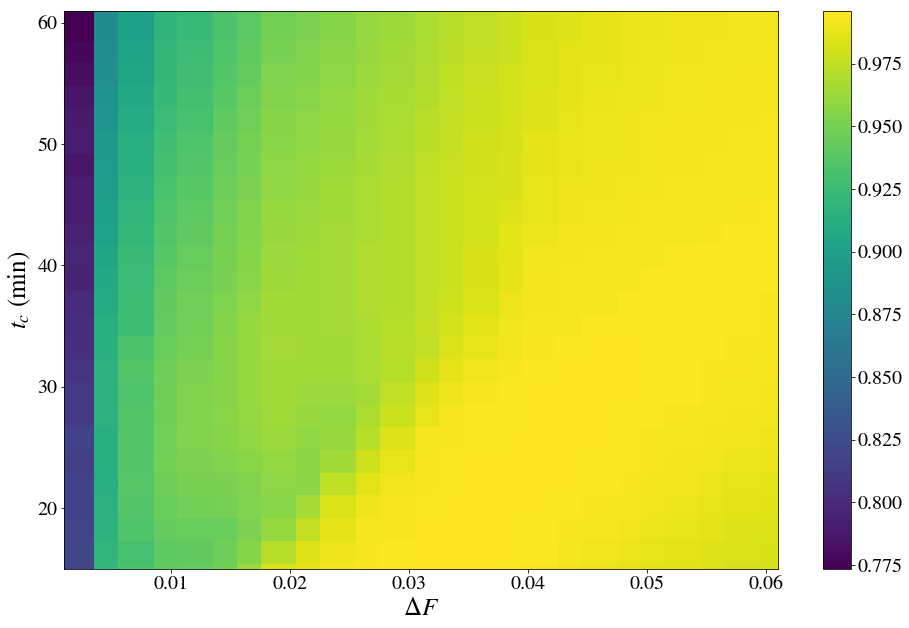

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
fig.subplots_adjust(top=0.926,bottom=0.151,left=0.151,right=0.977,hspace=0.2,wspace=0.2)
sc = ax.scatter(1-delta,tcaida, c=corr_mov_SNR_100_N,edgecolor='none', alpha=1, s=1270,marker="s"); 
cbar = fig.colorbar(sc);
cbar.ax.tick_params(labelsize=20) 
cbar.set_label('Coeficiente de correlación', size=25)
ax.set_xlabel('$\Delta F$',size=25)
ax.set_ylabel('$t_{c}$ (min)',size=25)
ax.set_xlim(0.001,0.061)
ax.set_ylim(15,61)
plt.xticks(size=20)
plt.yticks(size=20)

plt.savefig('../reports/figures/corrMovSNR_100.png')